C:\Users\n8tew\AppData\Local\Temp\ipykernel_11248\817470288.py:25: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


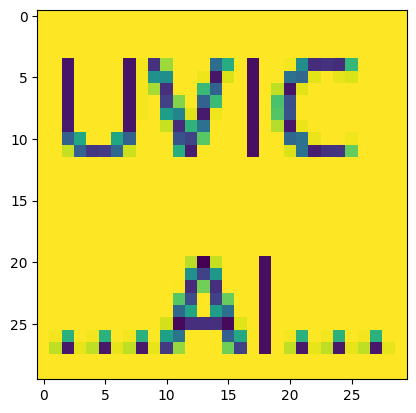

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def text_to_array(text, font_path, size=(30, 30)):
    """
    Generate a low-resolution binary 2D array representing the given text.

    Args:
    - text (str): Text to render into the array.
    - font_path (str): Path to the .ttf font file.
    - size (tuple): Desired size of the output array (width, height).

    Returns:
    - np.array: 2D binary array representing the rendered text.
    """
    # Create a blank image with white background
    image = Image.new('RGB', size, "white")
    draw = ImageDraw.Draw(image)
    
    # Load a font
    font = ImageFont.truetype(font_path, 11)

    # Calculate text width and height
    text_width, text_height = draw.textsize(text, font=font)
    
    # Calculate position to center the text
    position = ((size[0]-text_width)/2, (size[1]-text_height)/4)
    
    # Draw the text onto the image
    draw.text(position, text, fill="black", font=font)
    
    # Convert to grayscale
    grayscale_image = image.convert("L")
    
    # Convert to binary (0 or 1) using a threshold
    # binary_image = grayscale_image.point(lambda x: 0 if x>128 else 1, '1')
    
    # Convert to NumPy array
    array = np.array(grayscale_image, dtype=np.uint8)

    return array

# Example usage
# Replace 'path/to/font.ttf' with the actual path to a font file on your system
text_array = text_to_array("UVIC\n...AI...", "font.ttf")
plt.imshow(text_array)
plt.show()
# print(text_array)

# Note: You need to specify the path to a font file on your system for the `font_path` parameter.
# The font size and position calculation in this example are quite basic; adjustments might be needed
# for optimal text placement and readability.
